# Coursera上NG机器学习课作业Python实现
**关键词**
- 多维变量的线性回归
- 特征标准化
    + 均值、标准差计算法
- 学习率与循环次数对Cost函数收敛的影响
- 最小二次乘法直接计算theta
    + 注意当X不是满秩矩阵时的情况（详见西瓜书）

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 19 14:14:04 2018

@author: alvin
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat

**函数部分**
- 数据可视化
- 数据标准化
- 损失函数
- 梯度下降

In [2]:
def _plot(X): 
    plt.grid(True)
    plt.xlim([-100,5000])
    plt.title('Why does it need Feature Normalization! ')
    dummy = plt.hist(X[:,0],label = 'areas',color='orange')
    dummy = plt.hist(X[:,1],label = 'the num of bedrooms')
    plt.ylabel('number of this value')
    dummy = plt.legend()
    plt.show();
    
    plt.grid(True)
    plt.xlim([0,10])
    dummy = plt.hist(X[:,0],label = 'areas',color='orange')
    dummy = plt.hist(X[:,1],label = 'the num of bedrooms')
    plt.xlabel('value')
    plt.ylabel('number of this value')
    dummy = plt.legend()
    plt.show();
    
def _plot_norm(X): 
    plt.grid(True)
    plt.xlim([-5,5])
    plt.title('After Feature Normalization! ')
    dummy = plt.hist(X[:,0],label = 'areas',color='orange')
    dummy = plt.hist(X[:,1],label = 'the num of bedrooms')
    plt.ylabel('Value after norm')
    dummy = plt.legend()
    plt.show();

def _plot_cov_Cost(J_histroy):
    plt.figure(figsize=(10,6));
    plt.plot(range(len(J_histroy)),J_histroy,'b-');
    plt.grid(True);
    plt.title("Convergence of Cost Function");
    plt.xlabel("Iterations");
    plt.ylabel("Cost:J");
    plt.show()

In [3]:
def featureNormalize(X):
    # 确保特征值在差不多的区间以内可采用 均值 标准化
    # 返回一个经过标准化的X向量，每一个特征的均值都为0，标准差为1
    # 返回均值mu，和标准差sigma
    X_norm = X.copy();# 初始化，备份一个X，作为未来的返回值
    mu = np.zeros((1,X.shape[1])); # 在这里mu是一个1*n的向量
    sigma = np.zeros((1,X.shape[1])) # 在这里sigma也是一个1*n的向量
    mu = np.mean(X,axis=0); # 计算出X的均值向量
    sigma = np.std(X,axis=0,ddof=1); # 计算出X的标准差向量,注意到ddof参数的设置
    _mu = repmat(mu,X.shape[0],1)
    _sigma = repmat(sigma,X.shape[0],1)
    X_norm = X_norm - _mu  # 使用标准化计算公式
    X_norm = X_norm / _sigma
    return X_norm,mu,sigma
    
def computeCostMulti(X,y,theta):
    # 这次可以使用上次写好的Cost函数，因为之前的就是向量化的计算
    #这里实现损失函数的计算方法，
    #theta是n维向量 以及 截距项 因此为 （n+1）*1
    #X是增加了一个截矩项的特征向量矩阵 m*(n+1)
    #y是对应真实的估计值向量 m*1
    m = y.size;
    hyp = np.dot(X,theta); # 这里的hyp是 (theta_0*x1 + theta_1)
    a = hyp - y;  
    coef = 1./(2*m);
    J = coef * np.dot(a.T,a);#返回一个实数
    return float(J); 
    
def gradientDescentMulti(X,y,theta,alpha,iterations):   
     # 这次可以使用上次写好的Cost函数，因为之前的就是向量化的计算
     # 通过梯度下降来得到theta的估计值
     # 根据循环次数和学习率alpha来更新theta参数
    m = y.size;
    J_histroy = [];#初始化cost的数组，用于存放cost的值
    theta_histroy = [];
     #梯度下降公式实现
    for iter in range(iterations) :
        a = np.dot(np.transpose(X),np.dot(X,theta)-y);
        theta_histroy.append(list(theta[:,0]))
        theta = theta - alpha * (1/m) * a;
        J_histroy.append(computeCostMulti(X,y,theta));#将每一次梯度下降的损失函数结果存起来
    return theta,J_histroy,theta_histroy;

**主函数部分**

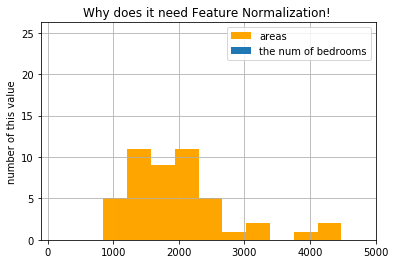

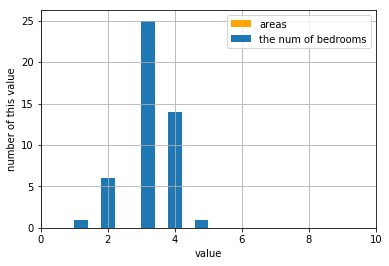

In [4]:
# =====================数据集导入=======================
datapath = "data/ex1data2.txt";
data = np.loadtxt(datapath,delimiter=',',usecols=(0,1,2),unpack=True);
X = np.transpose(np.array(data[:-1]));
y = np.transpose(np.array(data[-1:]));
m = y.size;
Origal_X = X;

# =====================可视化数据点=======================
_plot(X);# 可以看出这里需要特征标准化，不然对于X,第二个特征显得太不重要了

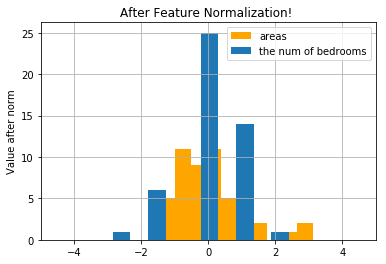

[[  1.00000000e+00   1.30009869e-01  -2.23675187e-01]
 [  1.00000000e+00  -5.04189838e-01  -2.23675187e-01]
 [  1.00000000e+00   5.02476364e-01  -2.23675187e-01]
 [  1.00000000e+00  -7.35723065e-01  -1.53776691e+00]
 [  1.00000000e+00   1.25747602e+00   1.09041654e+00]
 [  1.00000000e+00  -1.97317285e-02   1.09041654e+00]
 [  1.00000000e+00  -5.87239800e-01  -2.23675187e-01]
 [  1.00000000e+00  -7.21881404e-01  -2.23675187e-01]
 [  1.00000000e+00  -7.81023044e-01  -2.23675187e-01]
 [  1.00000000e+00  -6.37573110e-01  -2.23675187e-01]
 [  1.00000000e+00  -7.63567023e-02   1.09041654e+00]
 [  1.00000000e+00  -8.56737193e-04  -2.23675187e-01]
 [  1.00000000e+00  -1.39273340e-01  -2.23675187e-01]
 [  1.00000000e+00   3.11729182e+00   2.40450826e+00]
 [  1.00000000e+00  -9.21956312e-01  -2.23675187e-01]
 [  1.00000000e+00   3.76643089e-01   1.09041654e+00]
 [  1.00000000e+00  -8.56523009e-01  -1.53776691e+00]
 [  1.00000000e+00  -9.62222960e-01  -2.23675187e-01]
 [  1.00000000e+00   7.65467

In [5]:
# =====================特征标准化=========================
X,mu,sigma = featureNormalize(X)
_plot_norm(X) # 可视化标准化后的图
# 为X增加一个intercept项
b = np.ones((X.shape[0],1));
X = np.concatenate((b,X),axis=1);# 这里在X前列加上1，与上一次的代码不同，这一次尽量与Ng的作业一致
print(X) # 打印出经过标准化后的X

In [6]:
# =====================梯度下降=========================
initial_theta = np.zeros((X.shape[1],1));
theta,J_history,theta_histroy = gradientDescentMulti(X,y,initial_theta,0.1,50) # 设置合适的学习率 learning rate和循环次数
theta_1,J_history1,theta_histroy1 = gradientDescentMulti(X,y,initial_theta,0.1,500)
theta_2,J_history2,theta_histroy2 = gradientDescentMulti(X,y,initial_theta,1.5,50)
print(theta)

[[  3.38658249e+05]
 [  1.04127516e+05]
 [ -1.72205334e+02]]


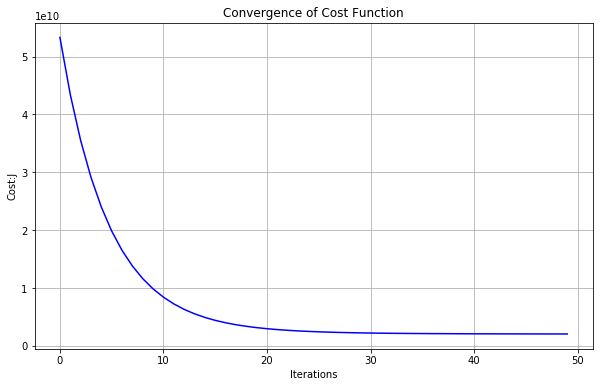

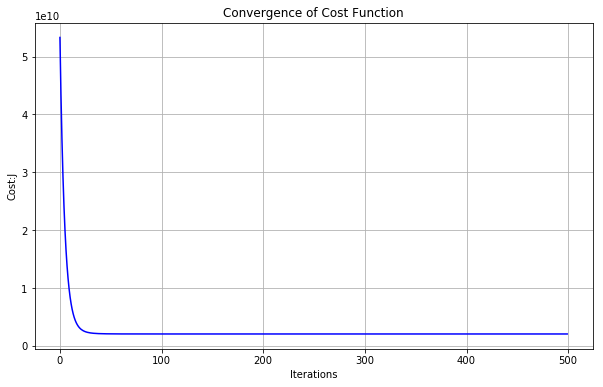

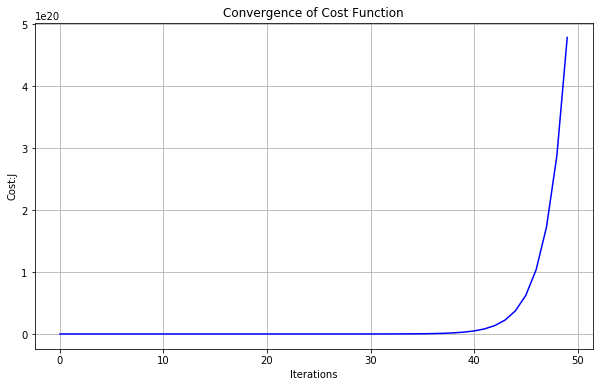

In [7]:
# =====================Cost函数的收敛图像=========================
_plot_cov_Cost(J_history)
_plot_cov_Cost(J_history1) # 循环次数多，早已收敛
_plot_cov_Cost(J_history2) # 学习率高，可能导致无法收敛

In [8]:
# ===================== 最小二次乘法=============================
from numpy.linalg import inv
Origal_X = np.concatenate((b,Origal_X),axis=1);
theta_Norm = np.dot(np.dot(inv(np.dot(Origal_X.T,Origal_X)),Origal_X.T),y);
print(theta_Norm)

new_X = np.array([1650.,3.]);
price = np.dot(np.r_[1,new_X],theta_Norm);
print("$%0.2f" % float(price))

[[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]
$293081.46
